In [5]:
import matplotlib.pyplot as plt
import qiskit as qk

from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector


# load IBMQ account
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
def bv_algorithm(secret_number, return_circuit=False):
    N = len(secret_number)
    
    # create circuit
    circuit = qk.QuantumCircuit(N+1, N)

    circuit.h([i for i in range(N)])

    circuit.x(N)
    circuit.h(N)

    circuit.barrier()

    # encode secret number in quantum circuit
    for i in range(N):
        if(secret_number[i] == '1'):
            circuit.cx((N-1)-i,N)

    circuit.barrier()

    circuit.h([i for i in range(N)])

    circuit.barrier()

    circuit.measure([i for i in range(N)], [i for i in range(N)])
    
    # run simulation
    simulator = qk.Aer.get_backend('qasm_simulator')
    result = qk.execute(circuit, backend=simulator, shots=1).result()
    counts = result.get_counts()
    
    if(return_circuit is True):
        return circuit, list(counts.keys())[0]
    else:
        return list(counts.keys())[0]   

101001


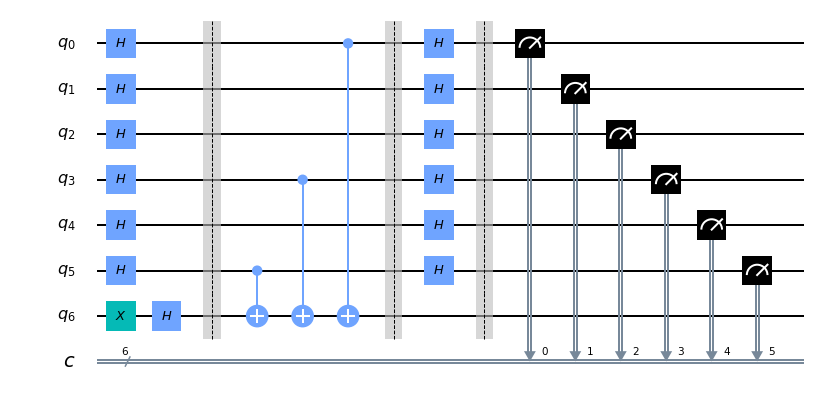

In [17]:
secret_number = '101001'
circuit, guessed_number = bv_algorithm(secret_number, return_circuit=True)

print(guessed_number)
circuit.draw(output='mpl')